In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
#path where you stored your copy of the nuScenes dataset.
DATAROOT = Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes')
dataset_file = 'full_v1.0-trainval_lidar_1_10.csv'

# Data Analysis


The dataset contains the following columns for each state of the self-driving car:

- instance_token: A unique identifier for the vehicle instance.
- translation: The vehicle's position in 3D space (x, y, z coordinates).
- yaw: The orientation of the vehicle around the vertical axis (rotation angle).
- velocity: The vehicle's speed in a given direction.
- acceleration: The change in velocity over time.
- heading_change_rate: The rate of change of the vehicle's direction.
- timestamp: The time at which the state was recorded.
- scene_token: A unique identifier for the scenario or environment the vehicle is in

Load the CSV data into a DataFrame


In [3]:

dtype_dict = {
    'modality': 'category',  # for limited set of modalities, 'category' is efficient
    'scene_token': 'str',
    'steering_angle':'float64',
    'location':'str',  
    'timestamp': 'str',  # To enable datetime operations
    'rotation': 'object',  # Quaternion (lists)
    'x': 'float64',
    'y': 'float64',
    'z': 'float64',
    'yaw': 'float64',  
    'velocity': 'float64',
    'acceleration': 'float64',
    'yaw_rate': 'float64'
}
df = pd.read_csv(DATAROOT / dataset_file, dtype=dtype_dict, parse_dates=['timestamp'])

df.head()

,sample_token,scene_token,steering_angle,location,night,rain,CAM_FRONT,modality,timestamp,rotation,x,y,z,yaw,velocity,yaw_rate,acceleration
0,3481dbfd65864925b4a4b2d6b7256d44,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,0,0,{},lidar,2018-07-27 16:20:29.048702,"[0.27668389210179944, -0.0026796705507768723, ...",427.968583,1622.155828,0.0,2.580930,0.000004,0.000033,0.000000
1,394d87634b6c46049c2f06e84026096a,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,0,0,{},lidar,2018-07-27 16:20:29.548597,"[0.27667585323668453, -0.002728894247491543, 0...",427.968582,1622.155829,0.0,2.580947,0.000004,0.000033,0.000000
2,656b4207ba9542b2a9bb7c03aa61b325,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,0,0,{},lidar,2018-07-27 16:20:30.048445,"[0.2766247744031405, -0.0027369692279543625, 0...",427.968589,1622.155824,0.0,2.581053,0.000018,0.000212,0.000028
3,2f789ae558a84df9b8daee0674a7985f,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,0,0,{},lidar,2018-07-27 16:20:30.548859,"[0.27663215946727443, -0.002737971665731827, 0...",427.968593,1622.155822,0.0,2.581038,0.000008,-0.000031,-0.000020
4,623e58c15be546b39a36796a5b03d18f,0053e9c440a94c1b84bd9c4223efc4b0,0.178096,boston-seaport,0,0,{},lidar,2018-07-27 16:20:31.048731,"[0.27662503731230986, -0.002729398219646146, 0...",427.968591,1622.155823,0.0,2.581052,0.000004,0.000029,-0.000008


In [4]:
df.shape

(33351, 17)

### Variantion for position, velocity, acceleration, yaw, heading_change_rate

In [26]:
# Group by 'scene_token'
grouped_df = df.groupby('scene_token')

# Differences for each feature
delta_df = pd.DataFrame({
    'x_diff': grouped_df['x'].diff(),
    'y_diff': grouped_df['y'].diff(),
    'z_diff': grouped_df['z'].diff(),
    'velocity_diff': grouped_df['velocity'].diff(),
    'acceleration_diff': grouped_df['acceleration'].diff(),
    'yaw_diff': grouped_df['yaw'].diff(),
    'yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'steering_angle_diff': grouped_df['steering_angle'].diff()
})


In [27]:
# Absolute differences for each feature
abs_df = pd.DataFrame({
    'abs_x_diff': grouped_df['x'].diff().abs(),
    'abs_y_diff': grouped_df['y'].diff().abs(),
    'abs_z_diff': grouped_df['z'].diff().abs(),
    'abs_velocity_diff': grouped_df['velocity'].diff().abs(),
    'abs_acceleration_diff': grouped_df['acceleration'].diff().abs(),
    'abs_yaw_diff': grouped_df['yaw'].diff().abs(),
    'abs_yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'abs_steering_angle_diff': grouped_df['steering_angle'].diff()
})

### Feature analysis

####  Original Dataset

In [28]:
numeric_columns = ['velocity', 'acceleration', 'yaw', 'yaw_rate', 'steering_angle']

stats = df[numeric_columns].describe()
stats.loc[['mean', 'std', 'min', 'max']]

,velocity,acceleration,yaw,yaw_rate,steering_angle
mean,5.076011e+00,0.004975,0.240012,-0.000471,-0.041316
std,3.615023e+00,0.629692,1.837258,0.780214,1.063343
min,3.050844e-09,-4.839118,-3.141337,-15.664581,-8.518880
max,1.843919e+01,3.383211,3.141424,15.413213,8.705702


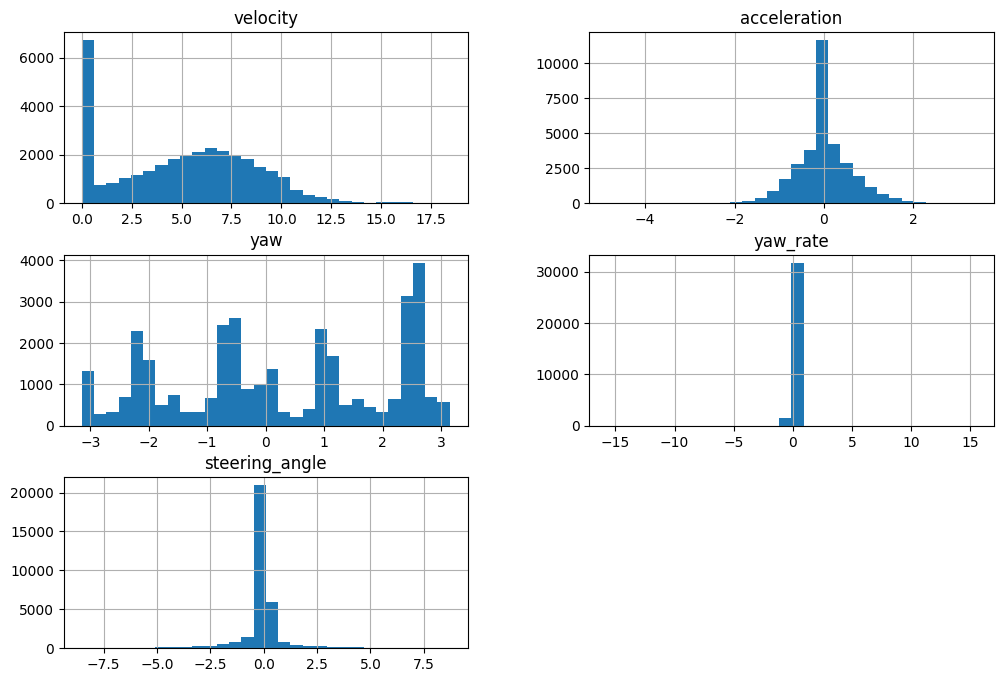

In [29]:
df[numeric_columns].hist(bins=30, figsize=(12, 8))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

#### Acceleration Box Plot to determine acceleration Threshold 

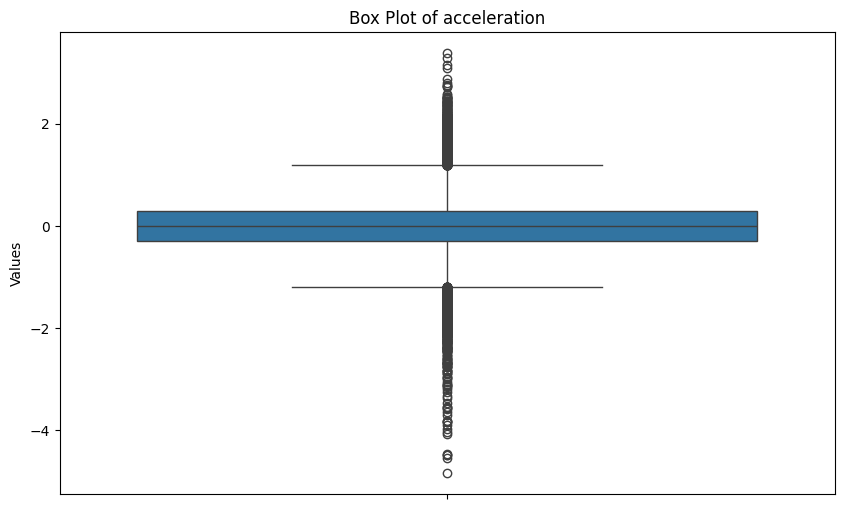

In [30]:
import seaborn as sns

# Alternatively, using seaborn for a more polished plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='acceleration')
plt.title('Box Plot of acceleration')
plt.ylabel('Values')
plt.show()

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)

IQR = Q3 - Q1
        
#without outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
        
#df = df[(df['acceleration'] >= lower_bound) & (df['acceleration'] <= upper_bound)]
        
#Q1 = df['acceleration'].quantile(0.25)
#Q3 = df['acceleration'].quantile(0.75)
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

Q1: -0.30244285214348093
Q3: 0.2953415403859778


## Statistics on Detected Objects


#### Distribution of Annotations for Frame

Plot distribution of object counts in front camera, in a frame in a scene

In [53]:
import ast
import pandas as pd
import matplotlib.pyplot as plt


cam_type = 'CAM_FRONT' #['CAM_FRONT_LEFT', 'CAM_FRONT_RIGHT']

counts_pre_disc=[]
counts_post_disc=[]
# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene]
    
    
    # Loop through each frame in the scene
    for _, frame in scene_df.iterrows():
        #n_detections = {}
        
        tot_post_count = 0
        tot_pre_count = 0
        objects = frame[cam_type]
            
        for (category, attribute), count in ast.literal_eval(objects).items():
            if 'human' not in category and 'without_rider' not in attribute:
                tot_post_count += count
            tot_pre_count +=count
            
        #n_detections[cam_type] = tot_count
        counts_pre_disc.append(tot_pre_count)
        counts_post_disc.append(tot_post_count)
    

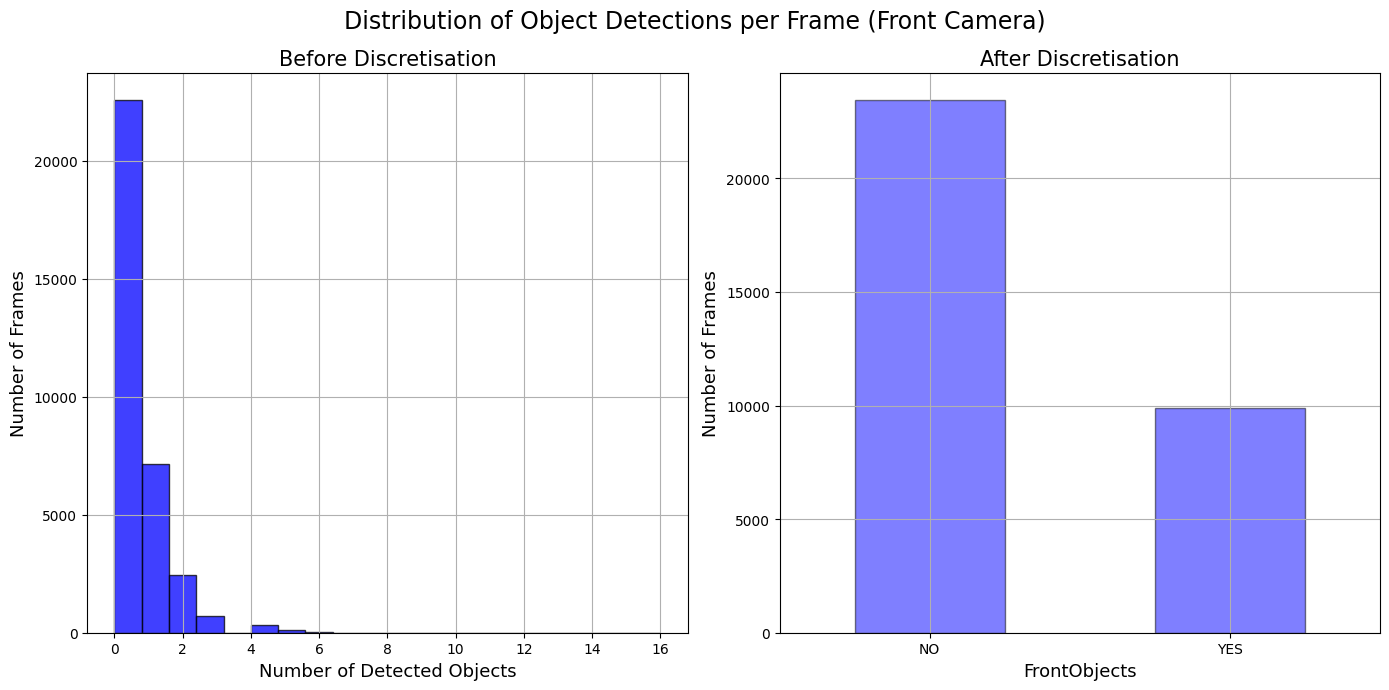

In [56]:
# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(counts_pre_disc, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.suptitle('Distribution of Object Detections per Frame (Front Camera)', fontsize = 17)
plt.title('Before Discretisation',fontsize = 15)
plt.xlabel('Number of Detected Objects', fontsize = 13)
plt.ylabel('Number of Frames', fontsize = 13)
plt.grid()

cam_front_discretized = pd.cut(counts_post_disc, bins=[-1, 0 ,100], labels=['NO','YES'])#labels=['0','1+'])
plt.subplot(1, 2, 2)
cam_front_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.5)
plt.title('After Discretisation',fontsize = 15)
#plt.xlabel('Number of Detected Objects', fontsize = 13)
plt.xlabel('FrontObjects', fontsize = 13)
plt.ylabel('Number of Frames', fontsize = 13)
plt.xticks(rotation=0)  

plt.grid()
plt.tight_layout()
#plt.show()
plt.savefig('obj_detections_iter1.png')

#### Counts for Vulnerable Detected Objects

In [34]:
import matplotlib.pyplot as plt
import numpy as np

camera_cols = [col for col in df.columns if 'CAM' in col]

# Lists to hold counts for plotting
pedestrian_counts = []
bike_counts = []
# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene]
    scene_df = scene_df[camera_cols]

    # Loop through each frame in the scene
    for _, frame in scene_df.iterrows():        
        tot_ped_count = 0
        tot_bike_count = 0
        # Loop through each camera type
        for cam_type, objects in frame.items():            
            for (category, attribute), count in ast.literal_eval(objects).items():
                if 'human.pedestrian' in category:
                    if 'personal_mobility' in category and 'with_rider' in attribute: #scooter
                        tot_bike_count+=count
                    else:
                        tot_ped_count +=count
                elif 'cycle' in category and 'with_rider' in attribute:
                    tot_bike_count +=count

            
            
        pedestrian_counts.append(tot_ped_count)
        bike_counts.append(tot_bike_count)
    


Pedestrian Counts

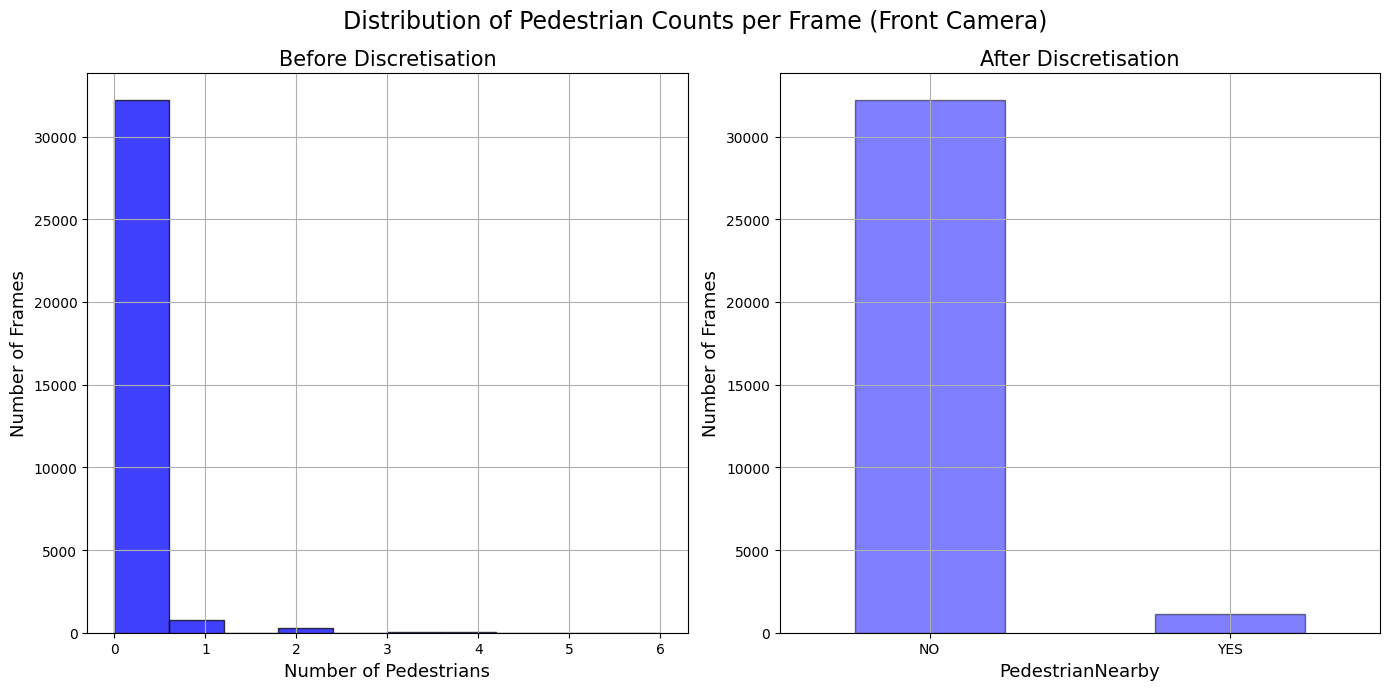

In [35]:
pedestrian_discretized = pd.cut(pedestrian_counts, bins=[-1, 0, 1000], labels=['NO','YES'])

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(pedestrian_counts, bins=10, alpha=0.75, color='blue', edgecolor='black')
plt.suptitle('Distribution of Pedestrian Counts per Frame (Front Camera)',fontsize = 17)
plt.title('Before Discretisation',fontsize = 15)
plt.xlabel('Number of Pedestrians',fontsize = 13)
plt.ylabel('Number of Frames',fontsize = 13)
plt.grid()

plt.subplot(1, 2, 2)
pedestrian_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.5)
plt.title('After Discretisation',fontsize = 15)
#plt.xlabel('Number of Pedestrians',fontsize = 13)
plt.xlabel('PedestrianNearby',fontsize = 13)
plt.ylabel('Number of Frames',fontsize = 13)
plt.xticks(rotation=0)  
plt.grid()

plt.tight_layout()
#plt.show()
plt.savefig('ped_counts.png')
#NOTE: no scenes with many pedestrians nearby (ie. missing scenes around schools or similar)

Two-Wheeler Counts

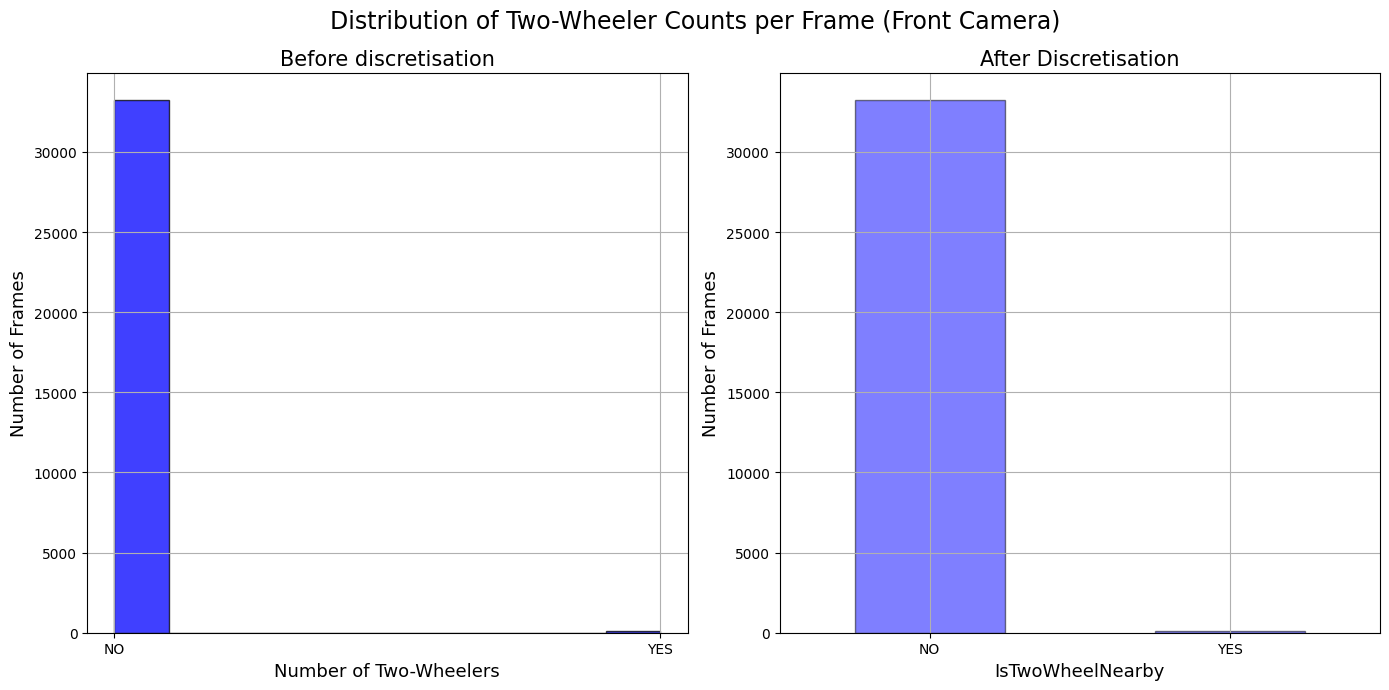

In [36]:
bike_discretized = pd.cut(bike_counts,bins=[-1, 0,1000],labels = ['NO','YES'])

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bike_discretized, bins=10, alpha=0.75, color='blue', edgecolor='black')
plt.suptitle('Distribution of Two-Wheeler Counts per Frame (Front Camera)', fontsize=17)
plt.title('Before discretisation', fontsize=15)
plt.xlabel('Number of Two-Wheelers', fontsize=13)
plt.ylabel('Number of Frames', fontsize=13)
plt.grid()

plt.subplot(1, 2, 2)
bike_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.5)
plt.title('After Discretisation', fontsize=15)
plt.xlabel('IsTwoWheelNearby', fontsize=13)#'Object Count Discretization')
plt.ylabel('Number of Frames', fontsize=13)
plt.xticks(rotation=0)  
plt.grid()

plt.tight_layout()
plt.show()

#NOTE: no scenes with many pedestrians nearby (ie. missing scenes around schools or similar)

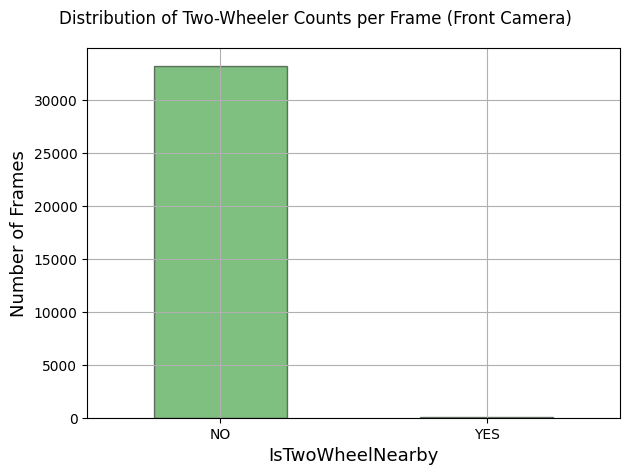

In [37]:
bike_discretized.value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black', alpha=0.5)
plt.suptitle('Distribution of Two-Wheeler Counts per Frame (Front Camera)')#, fontsize=17)
plt.xlabel('IsTwoWheelNearby', fontsize=13)#'Object Count Discretization')
plt.ylabel('Number of Frames', fontsize = 13)
plt.xticks(rotation=0) 
plt.grid()
plt.tight_layout()
#plt.show()
plt.savefig('two_wheel_counts.png')

## Scenes classification

In [5]:
# Count unique scenes based on conditions
no_rain_scenes = df[df['rain'] == 0]['scene_token'].nunique()
rain_scenes = df[df['rain'] == 1]['scene_token'].nunique()
day_scenes = df[df['night'] == 0]['scene_token'].nunique()
night_scenes = df[df['night'] == 1]['scene_token'].nunique()

# DataFrames for high and low visibility
high_visibility_df = df[(df['night'] == 0) & (df['rain'] == 0)]
low_visibility_df = df[(df['night'] == 1) | (df['rain'] == 1)]

# Counts for high and low visibility
high_visibility_count = high_visibility_df['scene_token'].nunique()
low_visibility_count = low_visibility_df['scene_token'].nunique()

# Calculate intersections for low visibility
rain_scenes_set = set(df[df['rain'] == 1]['scene_token'])
night_scenes_set = set(df[df['night'] == 1]['scene_token'])
low_visibility_scenes_set = set(low_visibility_df['scene_token'])

rain_only = len(rain_scenes_set & low_visibility_scenes_set - night_scenes_set)
night_only = len(night_scenes_set & low_visibility_scenes_set - rain_scenes_set)
both_rain_night = len(rain_scenes_set & night_scenes_set) # & low_visibility_scenes_set)


Night vs Day / Rain vs No rain Scenes

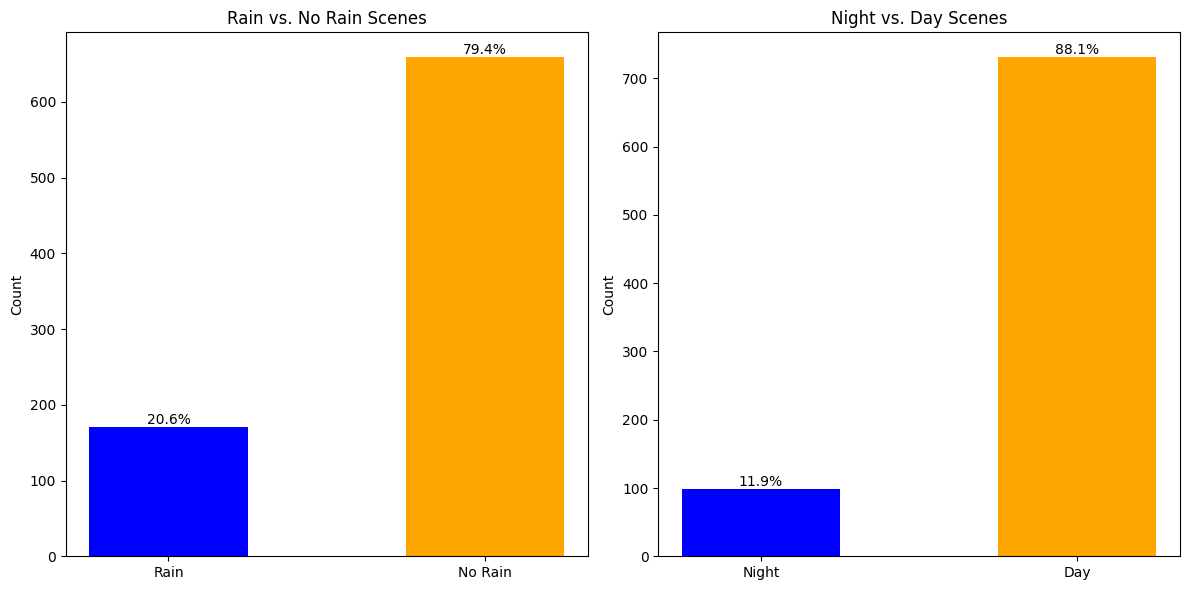

In [7]:
# Bar plot for rain vs. no rain and night vs. day
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Rain vs. No Rain
bars1 = axes[0].bar(['Rain', 'No Rain'], [rain_scenes, no_rain_scenes], color=['blue', 'orange'], width=0.5)
axes[0].set_title('Rain vs. No Rain Scenes')
axes[0].set_ylabel('Count')

# Add percentage labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    percentage = yval / (rain_scenes + no_rain_scenes) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Night vs. Day
bars2 = axes[1].bar(['Night', 'Day'], [night_scenes, day_scenes], color=['blue', 'orange'], width=0.5)
axes[1].set_title('Night vs. Day Scenes')
axes[1].set_ylabel('Count')

# Add percentage labels on top of bars
for bar in bars2:
    yval = bar.get_height()
    percentage = yval / (night_scenes + day_scenes) * 100
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

High visibility vs Low visibility Scenes

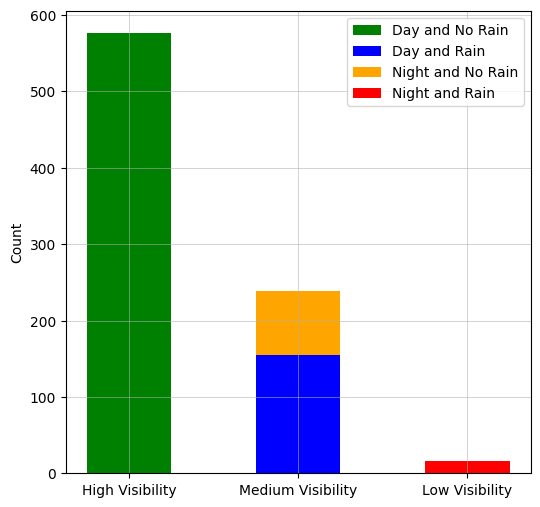

In [16]:

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the high visibility bar
ax.bar('High Visibility', high_visibility_count, color='green', label='Day and No Rain',width=0.5)

# Plot the low visibility bars with distinction
ax.bar('Medium Visibility', rain_only, color='blue', label='Day and Rain', width=0.5)
ax.bar('Medium Visibility', night_only, bottom=rain_only, color='orange', label='Night and No Rain',width=0.5)
ax.bar('Low Visibility', both_rain_night, color='red', label='Night and Rain',width=0.5)



# Adding titles and labels
ax.set_ylabel('Count')#'Number of Scenes')
ax.legend()
ax.grid(True, linewidth=0.4)
# Display the plot
#plt.show()
plt.savefig('visibility_stats.png', dpi=100)